In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

In [ ]:
path = r"/content/sample_data/student_info (1).csv"
df  = pd.read_csv(path)

In [ ]:
df.head() 

,study_hours,student_marks
0,5.44,68.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [ ]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,9.94,96.75
198,6.60,78.05
199,8.35,83.50


In [ ]:
df.shape

(200, 2)

Discovering and Visualizing data to gain insights

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
df.describe()

,study_hours,student_marks
count,195.000000,200.000000
mean,6.983846,78.028650
std,1.277096,5.407101
min,5.010000,68.500000
25%,5.735000,73.235000
50%,7.010000,77.610000
75%,8.100000,82.512500
max,9.940000,98.870000


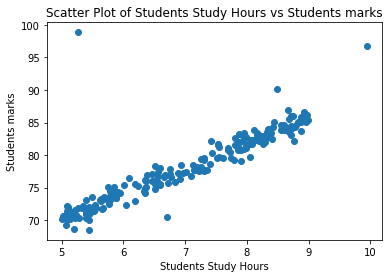

In [ ]:
plt.scatter(x = df.study_hours, y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

Preparing Data to be used with Machine Learning Algorithms

In [ ]:
#Data Cleaning

df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [ ]:
df.mean()

study_hours       6.983846
student_marks    78.028650
dtype: float64

In [ ]:
df2 = df.fillna(df.mean())

In [ ]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
df2.head()

,study_hours,student_marks
0,5.440000,68.50
1,6.560000,76.74
2,6.983846,78.68
3,5.670000,71.82
4,8.670000,84.19


In [ ]:
#Splitting the Dataset

In [ ]:
X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of Y = ", y.shape)

shape of X =  (200, 1)
shape of Y =  (200, 1)


In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


Training Data on Linear Regression Model

In [ ]:
lr = LinearRegression()


In [ ]:
# Training Data on Linear Regression Model
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Calculating Slope
lr.coef_

array([[3.8851174]])

In [ ]:
#Calculating y-intercept
lr.intercept_

array([50.97938445])

In [ ]:
# Predicting a value using of y Linear regression model
m = 3.88
c = 50.97
y  = m * 5 + c 
y

70.37

In [ ]:
lr.predict([[5]])[0][0].round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


70.4

In [ ]:
y_pred  = lr.predict(X_test)
y_pred

array([[83.22585885],
       [79.06878323],
       [84.66335228],
       [85.90658985],
       [84.81875698],
       [80.89478841],
       [73.08570244],
       [71.92016722],
       [73.47421418],
       [71.92016722],
       [73.70732122],
       [76.5823081 ],
       [73.47421418],
       [73.82387474],
       [83.07045415],
       [70.67692965],
       [73.47421418],
       [78.91337853],
       [75.76643344],
       [82.79849593],
       [76.85426631],
       [70.754632  ],
       [74.98940996],
       [78.11244664],
       [85.67348281],
       [82.68194241],
       [76.62115927],
       [85.12956637],
       [78.56371797],
       [81.51640719],
       [81.86606776],
       [83.26471002],
       [82.33228184],
       [81.24444897],
       [73.82387474],
       [71.41510196],
       [72.15327426],
       [81.67181189],
       [72.85259539],
       [72.19212544]])

In [ ]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.225859
1,7.230000,77.55,79.068783
2,8.670000,84.19,84.663352
3,8.990000,85.46,85.906590
4,8.710000,84.03,84.818757
5,7.700000,80.81,80.894788
6,5.690000,73.61,73.085702
7,5.390000,70.90,71.920167
8,5.790000,73.14,73.474214
9,5.390000,73.02,71.920167


In [ ]:
lr.score(X_test,y_test)

0.947598459943544

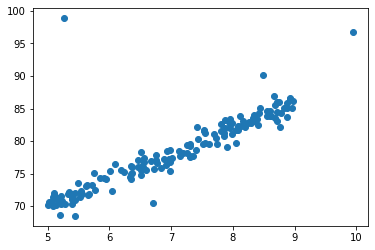

In [ ]:
plt.scatter(X_train,y_train)

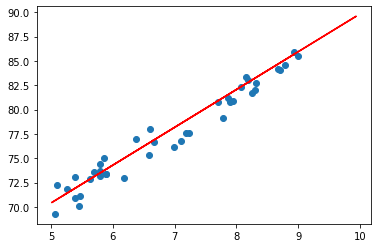

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

Saving the ML Model

In [ ]:
joblib.dump(lr, "student_marks_predictor.pkl")

['student_marks_predictor.pkl']

In [ ]:
model = joblib.load("student_marks_predictor.pkl")

In [ ]:
model.predict([[5]])[0][0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


70.40497143334255